In [2]:
import pandas as pd
import numpy as np

# Lire le fichier TSV
df = pd.read_csv(r'C:\Users\jcrig\Documents\FORMATION_SORBONNE\Machine_Learning_2_Faik\grand_ml_project\input_data\imdb\title.ratings.tsv', sep='\t')

# Afficher les premières lignes du DataFrame
df.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2070
1,tt0000002,5.6,279
2,tt0000003,6.5,2057
3,tt0000004,5.4,180
4,tt0000005,6.2,2804


In [3]:
# Lire le fichier TSV
df_title = pd.read_csv(r'C:\Users\jcrig\Documents\FORMATION_SORBONNE\Machine_Learning_2_Faik\grand_ml_project\input_data\imdb\title.basics.tsv', sep='\t')

# Afficher les premières lignes du DataFrame
df_title.head(5)

C:\Users\jcrig\AppData\Local\Temp\ipykernel_12104\2800482657.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_title = pd.read_csv(r'C:\Users\jcrig\Documents\FORMATION_SORBONNE\Machine_Learning_2_Faik\grand_ml_project\input_data\imdb\title.basics.tsv', sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Action,Adventure,Animation"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
# Afficher la ligne où la colonne 'nom' est égale à 'Bob'
result = df_title.query("primaryTitle == 'Toy Story'")
print(result)

              tconst  titleType primaryTitle originalTitle isAdult startYear  \
112086     tt0114709      movie    Toy Story     Toy Story       0      1995   
596056     tt0617998  tvEpisode    Toy Story     Toy Story       0      1999   
610007     tt0632185  tvEpisode    Toy Story     Toy Story       0      1997   
612977     tt0635208  tvEpisode    Toy Story     Toy Story       0      1997   
683946     tt0707112  tvEpisode    Toy Story     Toy Story       0      2000   
820117     tt0847116      short    Toy Story     Toy Story       0      1992   
1011241   tt10078986  tvEpisode    Toy Story     Toy Story       0      2019   
1605010   tt11147298  tvEpisode    Toy Story     Toy Story       0      2019   
1640891   tt11212932  tvEpisode    Toy Story     Toy Story       0      2018   
1871345   tt11629804  tvEpisode    Toy Story     Toy Story       1      2019   
1933644   tt11741286  tvEpisode    Toy Story     Toy Story       0      2020   
2056933   tt11963222  tvEpisode    Toy S

In [5]:
df_title['imdbId'] = df_title['tconst'].str.lstrip('tt0')

df_title.drop(['titleType','originalTitle','isAdult','endYear','runtimeMinutes'], axis=1, inplace=True)
df_title.head(5)

,tconst,primaryTitle,startYear,genres,imdbId
0,tt0000001,Carmencita,1894,"Documentary,Short",1
1,tt0000002,Le clown et ses chiens,1892,"Animation,Short",2
2,tt0000003,Pauvre Pierrot,1892,"Action,Adventure,Animation",3
3,tt0000004,Un bon bock,1892,"Animation,Short",4
4,tt0000005,Blacksmith Scene,1893,"Comedy,Short",5


In [6]:
df_title['startYear'] = df_title['startYear'].replace('\\N', pd.NA)

df_title['startYear'] = df_title['startYear'].apply(lambda x: int(x) if pd.notna(x) else x)

df_title['age'] = 2024 - df_title['startYear']

df_title.drop(['startYear'], axis=1, inplace=True)
df_title.head(5)


,tconst,primaryTitle,genres,imdbId,age
0,tt0000001,Carmencita,"Documentary,Short",1,130
1,tt0000002,Le clown et ses chiens,"Animation,Short",2,132
2,tt0000003,Pauvre Pierrot,"Action,Adventure,Animation",3,132
3,tt0000004,Un bon bock,"Animation,Short",4,132
4,tt0000005,Blacksmith Scene,"Comedy,Short",5,131


In [7]:
df_combined = pd.merge(df_title, df, on='tconst', how='inner')

df_combined.head(5)

,tconst,primaryTitle,genres,imdbId,age,averageRating,numVotes
0,tt0000001,Carmencita,"Documentary,Short",1,130,5.7,2070
1,tt0000002,Le clown et ses chiens,"Animation,Short",2,132,5.6,279
2,tt0000003,Pauvre Pierrot,"Action,Adventure,Animation",3,132,6.5,2057
3,tt0000004,Un bon bock,"Animation,Short",4,132,5.4,180
4,tt0000005,Blacksmith Scene,"Comedy,Short",5,131,6.2,2804


In [34]:
# Normalisation des valeurs de 'numVotes' pour obtenir un taux de popularité entre 0 et 1
df_combined['popularity_rate'] = (df_combined['numVotes'] - df_combined['numVotes'].min()) / (df_combined['numVotes'].max() - df_combined['numVotes'].min())
df_combined.head(5)


,tconst,primaryTitle,genres,imdbId,age,averageRating,numVotes,popularity_rate
0,tt0000001,Carmencita,"Documentary,Short",1,130,5.7,2070,0.000706
1,tt0000002,Le clown et ses chiens,"Animation,Short",2,132,5.6,279,0.000094
2,tt0000003,Pauvre Pierrot,"Action,Adventure,Animation",3,132,6.5,2057,0.000701
3,tt0000004,Un bon bock,"Animation,Short",4,132,5.4,180,0.000060
4,tt0000005,Blacksmith Scene,"Comedy,Short",5,131,6.2,2804,0.000956


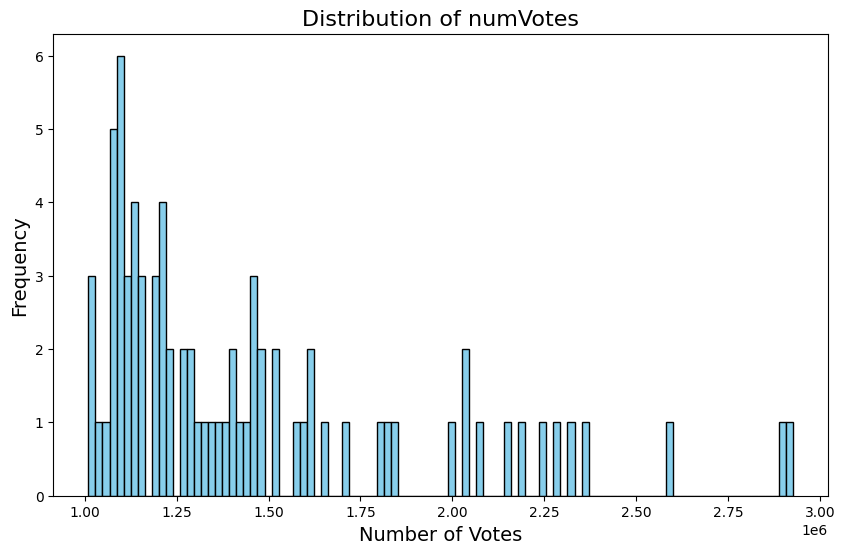

In [47]:
import matplotlib.pyplot as plt

# Supposons que vous ayez une série de données dans df_combined['numVotes']
data = df_combined['numVotes'][df_combined['numVotes']>1000000]

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, color='skyblue', edgecolor='black')

# Ajouter un titre et des étiquettes
plt.title('Distribution of numVotes', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Afficher le graphique
plt.show()

In [9]:
df_combined.dtypes

tconst            object
primaryTitle      object
genres            object
imdbId            object
age               object
averageRating    float64
numVotes           int64
dtype: object

In [22]:
'''

# Remplacer les occurrences de '\N' par NaN
df_title['age'] = df_title['age'].replace('\\N', np.nan)

# Convertir en entier si nécessaire
df_title['age'] = df_title['age'].astype(int)'''


C:\Users\jcrig\AppData\Local\Temp\ipykernel_12104\4174164323.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_title['age'] = df_title['age'].fillna(0)


In [24]:
df_combined.dtypes

tconst            object
primaryTitle      object
genres            object
imdbId            object
age               object
averageRating    float64
numVotes           int64
dtype: object

In [25]:
# Afficher les statistiques descriptives avec un format de nombres à 2 décimales
print(df_combined['age'].describe().apply(lambda x: f'{x:.2f}'))

count     1468579.00
unique        145.00
top             5.00
freq        63089.00
Name: age, dtype: object


In [28]:
# Calculer la moyenne des âges en ignorant les NaN
moyenne_age = df_combined['age'].mean()

# Calculer la médiane des âges en ignorant les NaN
mediane_age = df_combined['age'].median()

# Trouver l'age minimum
min_age = df_combined['age'].min()

# Afficher la moyenne calculée
print("La moyenne des âges est :", moyenne_age)

# Afficher la médiane calculée
print("La médiane des âges est :", mediane_age)

# Afficher l'age minimum
print("L'age minimum' est :", min_age)


La moyenne des âges est : 20.584279769763832
La médiane des âges est : 13.0
L'age minimum' est : -1


In [12]:
# Afficher les statistiques descriptives avec un format de nombres à 2 décimales
print(df_combined['averageRating'].describe().apply(lambda x: f'{x:.2f}'))



count    1468825.00
mean           6.95
std            1.38
min            1.00
25%            6.20
50%            7.10
75%            7.90
max           10.00
Name: averageRating, dtype: object


In [13]:
print(df_combined['numVotes'].describe().apply(lambda x: f'{x:.2f}'))

count    1468825.00
mean        1029.33
std        17710.12
min            5.00
25%           11.00
50%           26.00
75%          100.00
max      2926985.00
Name: numVotes, dtype: object


In [30]:
df_combined.isna().sum()

tconst             0
primaryTitle       1
genres             3
imdbId             0
age              246
averageRating      0
numVotes           0
dtype: int64

In [53]:
print(df_imdb_encoded.columns)

Index(['tconst', 'primaryTitle', 'imdbId', 'age', 'averageRating', 'numVotes',
       'popularity_rate', 'Action', 'Adult', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi',
       'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', '\N'],
      dtype='object')


In [54]:
# One-hot encoding des genres
df_genres_encoded = df_combined['genres'].str.get_dummies(sep=',')

# Concatenation avec le DataFrame original
df_imdb_encoded = pd.concat([df_combined, df_genres_encoded], axis=1)
df_imdb_encoded = df_imdb_encoded.drop(['tconst','genres', '\\N'], axis=1)
df_imdb_encoded.head(5)

,primaryTitle,imdbId,age,averageRating,numVotes,popularity_rate,Action,Adult,Adventure,Animation,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,Carmencita,1,130,5.7,2070,0.000706,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Le clown et ses chiens,2,132,5.6,279,0.000094,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Pauvre Pierrot,3,132,6.5,2057,0.000701,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Un bon bock,4,132,5.4,180,0.000060,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,Blacksmith Scene,5,131,6.2,2804,0.000956,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
# Export du dataframe au format csv
df_imdb_encoded.to_csv('output_data/imdb_encoded.csv', index=True)